# Census Income Project 
'''In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link:
https://archive.ics.uci.edu/ml/datasets/census+income
Problem Statement:
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.
Tasks To Be Performed:
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.'''


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('census-income.csv')

In [47]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [5]:
df["native-country"].unique() 

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [51]:
df["workclass"].unique()# here if you see, there are '?' which we need to address.Convert '?' to null.

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [52]:
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [53]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [54]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
#convert '?' to null.
df=df.replace("?", np.nan)


In [61]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [64]:
# since the null values are clustered only in occupation and native country and workclass( not scattered in 
#most of the colunms), we should drop and not replace.2) if null is less that 20 or 30% of total, we drop or else replace)
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
annual_income        0
dtype: int64

In [11]:
# No outlier analysis is required since its categorical output and most of the columns are objects.The algorithms we use are
#logistic Regression
# Decision Tree
# Random Forest.Best prediction among these are considered as the result
# whenever there are columns which are objects we do Label Encoding

from sklearn.preprocessing import LabelEncoder


In [12]:
le=LabelEncoder()

In [103]:
df.columns #To convert objects into numbers in columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
            df[col] = le.fit_transform(df[col])


In [14]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


# Model Building

In [20]:
# split the data into dependent and independent variables
x=df.iloc[:,:-1]
x


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [21]:
y=df["annual_income"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: annual_income, Length: 32537, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)

In [23]:
# lets test the predictions with different models and compare.
#1. Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model

LogisticRegression()

In [24]:
#Training
lr_model.fit(x_train,y_train)

LogisticRegression()

In [121]:
#Testing
lr_pred=lr_model.predict(x_test)
lr_pred

array([0, 1, 1, ..., 0, 0, 0])

In [122]:
y_test

9096     0
12860    0
13114    1
28743    0
21512    1
        ..
5644     0
12055    0
29320    0
3333     1
27606    0
Name: annual_income, Length: 9769, dtype: int32

In [124]:
#Accuracy 
from sklearn.metrics import *
lr_acc=accuracy_score(y_test,lr_pred)

In [125]:
lr_acc

0.7905619817790971

# Decision Tree


In [126]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [127]:
# Training
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
#Testing
dt_pred=dt_model.predict(x_test)
dt_pred

array([0, 1, 1, ..., 0, 0, 0])

In [129]:
y_test

9096     0
12860    0
13114    1
28743    0
21512    1
        ..
5644     0
12055    0
29320    0
3333     1
27606    0
Name: annual_income, Length: 9769, dtype: int32

In [130]:
#accuracy
dt_acc=accuracy_score(y_test,dt_pred)
dt_acc

0.8090899785034292

# Random Forest


In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model

RandomForestClassifier()

In [132]:
# Training
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [133]:
#test
rf_pred=rf_model.predict(x_test)
rf_pred

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
y_test

9096     0
12860    0
13114    1
28743    0
21512    1
        ..
5644     0
12055    0
29320    0
3333     1
27606    0
Name: annual_income, Length: 9769, dtype: int32

In [135]:
# accuracy
rf_acc=accuracy_score(rf_pred,y_test)
rf_acc

0.8577131743269526

In [141]:
print ("Accuracy of Logistic Regression", lr_acc)
print ("Accuracy of Decision Tree", dt_acc)  
print  ("Accuracy of Random Forest", rf_acc)

Accuracy of Logistic Regression 0.7905619817790971
Accuracy of Decision Tree 0.8090899785034292
Accuracy of Random Forest 0.8577131743269526


# Further Optimization of Random Tree

In [142]:
trees=[range(50,800,50)]  # starting from 50 to 800 @ a gap of 50

In [143]:
trees=[i for i in range(50,800,50)]
trees

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [146]:
for N in trees:
    rf_model=RandomForestClassifier(n_estimators=N,random_state=56)
    rf_model.fit(x_train,y_train)
    rf_pred=rf_model.predict(x_test)
    acc=accuracy_score(y_test,rf_pred)
    print("Random Forest with", N,"number of Trees having accuracy",acc)

Random Forest with 50 number of Trees having accuracy 0.8566895280990889
Random Forest with 100 number of Trees having accuracy 0.8561777049851571
Random Forest with 150 number of Trees having accuracy 0.8577131743269526
Random Forest with 200 number of Trees having accuracy 0.8572013512130208
Random Forest with 250 number of Trees having accuracy 0.8585320913092436
Random Forest with 300 number of Trees having accuracy 0.8587368205548163
Random Forest with 350 number of Trees having accuracy 0.858941549800389
Random Forest with 400 number of Trees having accuracy 0.8587368205548163
Random Forest with 450 number of Trees having accuracy 0.8593510082915344
Random Forest with 500 number of Trees having accuracy 0.8583273620636708
Random Forest with 550 number of Trees having accuracy 0.8593510082915344
Random Forest with 600 number of Trees having accuracy 0.8588391851776026
Random Forest with 650 number of Trees having accuracy 0.8586344559320299
Random Forest with 700 number of Trees h

# create a code for confusion Matrix


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,cmap="Blues")

<Axes: >

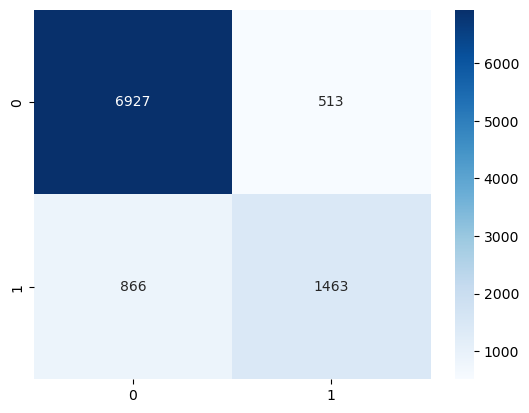

In [149]:
sns.heatmap(confusion_matrix(y_test,rf_pred),cmap="Blues",annot=True,fmt="d")

# Here we conclude that the best algorithm for the income prediction is random 
# forest with highest accuracy[ by taking predictions of 450 trees(n-estimator=450)]